## Task 1: Exploratory Data Analysis (EDA):
1.	Load the dataset and perform basic data exploration.
2.	Examine the distribution of features using histograms, box plots, or density plots.
3.	Investigate correlations between features to understand relationships within the data.

Task 2: Dimensionality Reduction with PCA:
1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
3.	Transform the original dataset into the principal components.

Task 3: Clustering with Original Data:
1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.
2.	Visualize the clustering results using appropriate plots.
3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

Task 4: Clustering with PCA Data:
1.	Apply the same clustering algorithm to the PCA-transformed dataset.
2.	Visualize the clustering results obtained from PCA-transformed data.
3.	Compare the clustering results from PCA-transformed data with those from the original dataset.

Task 5: Comparison and Analysis:
1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
2.	Discuss any similarities or differences observed in the clustering results.
3.	Reflect on the impact of dimensionality reduction on clustering performance.
4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.

Task 6: Conclusion and Insights

1.	Summarize the key findings and insights from the assignment.
2.	Discuss the practical implications of using PCA and clustering in data analysis.
3.	Provide recommendations for when to use each technique based on the analysis conducted.


### Task 1: Exploratory Data Analysis (EDA)
#1. Load the dataset and perform basic data exploration.

In [28]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'C:\\Users\\Dell\\Desktop\\wine.csv')

# Basic exploration
print(df.head())
print(df.info())
print(df.describe())


   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           No

#### 2. Examine the distribution of features.

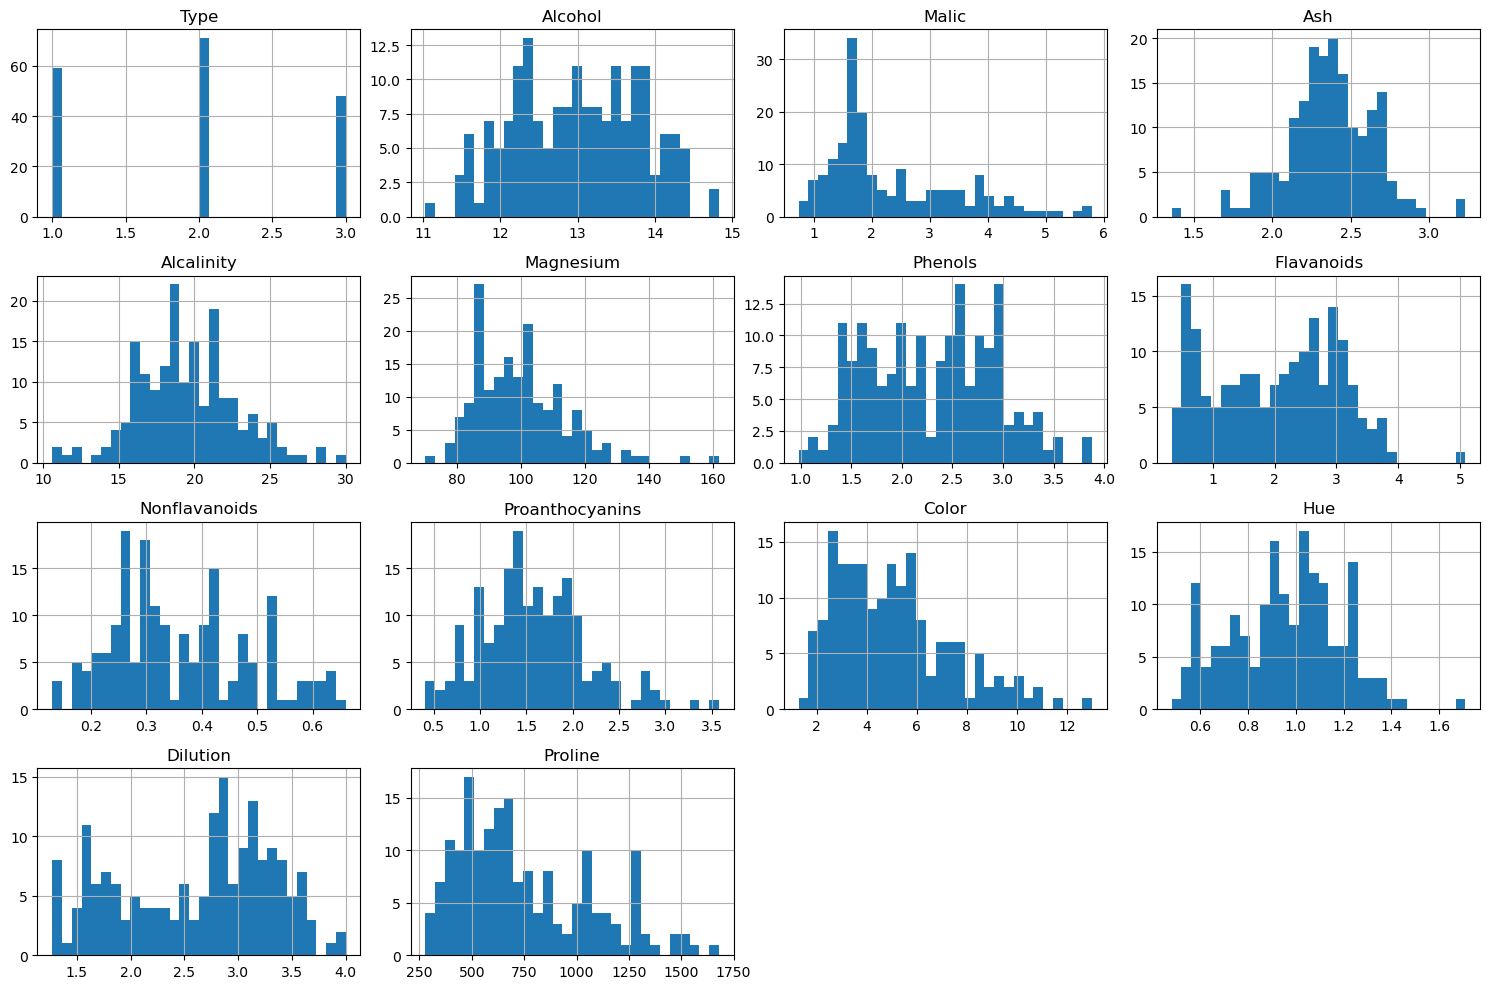

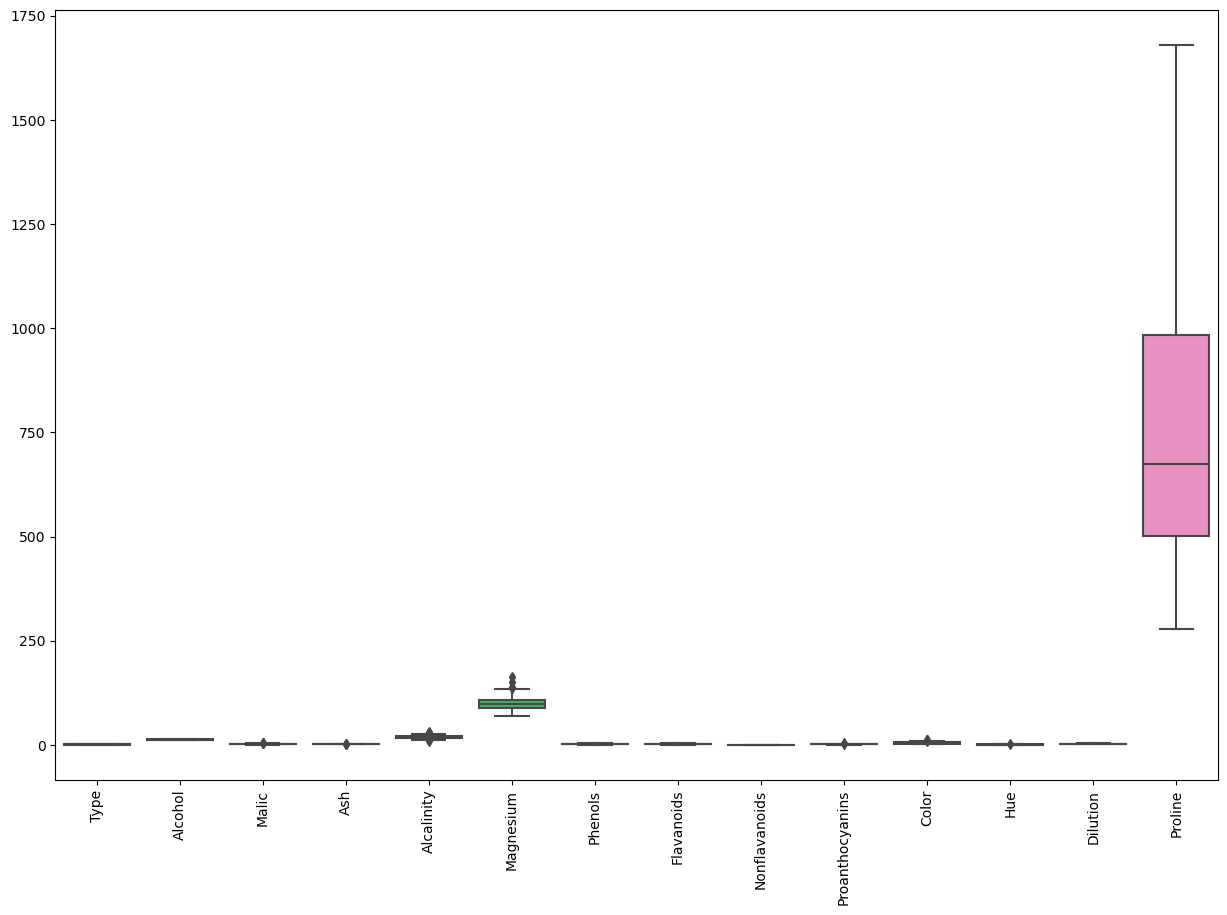

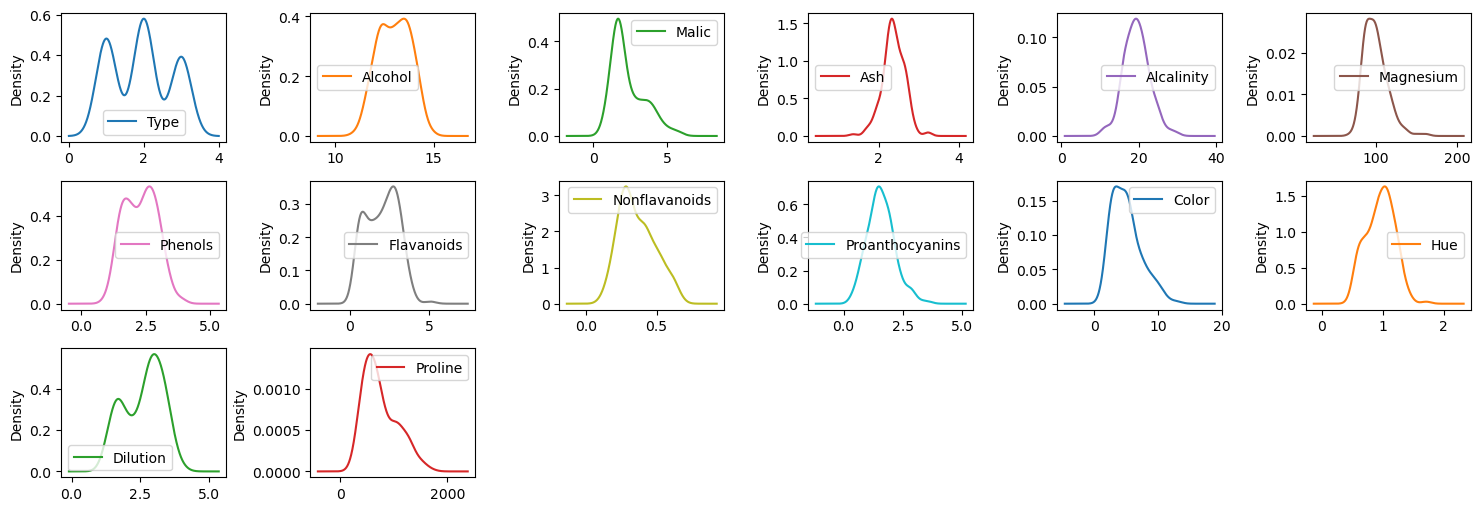

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Density plots
df.plot(kind='density', subplots=True, layout=(6, 6), sharex=False, figsize=(15, 10))
plt.tight_layout()
plt.show()


#### 3. Investigate correlations between features.

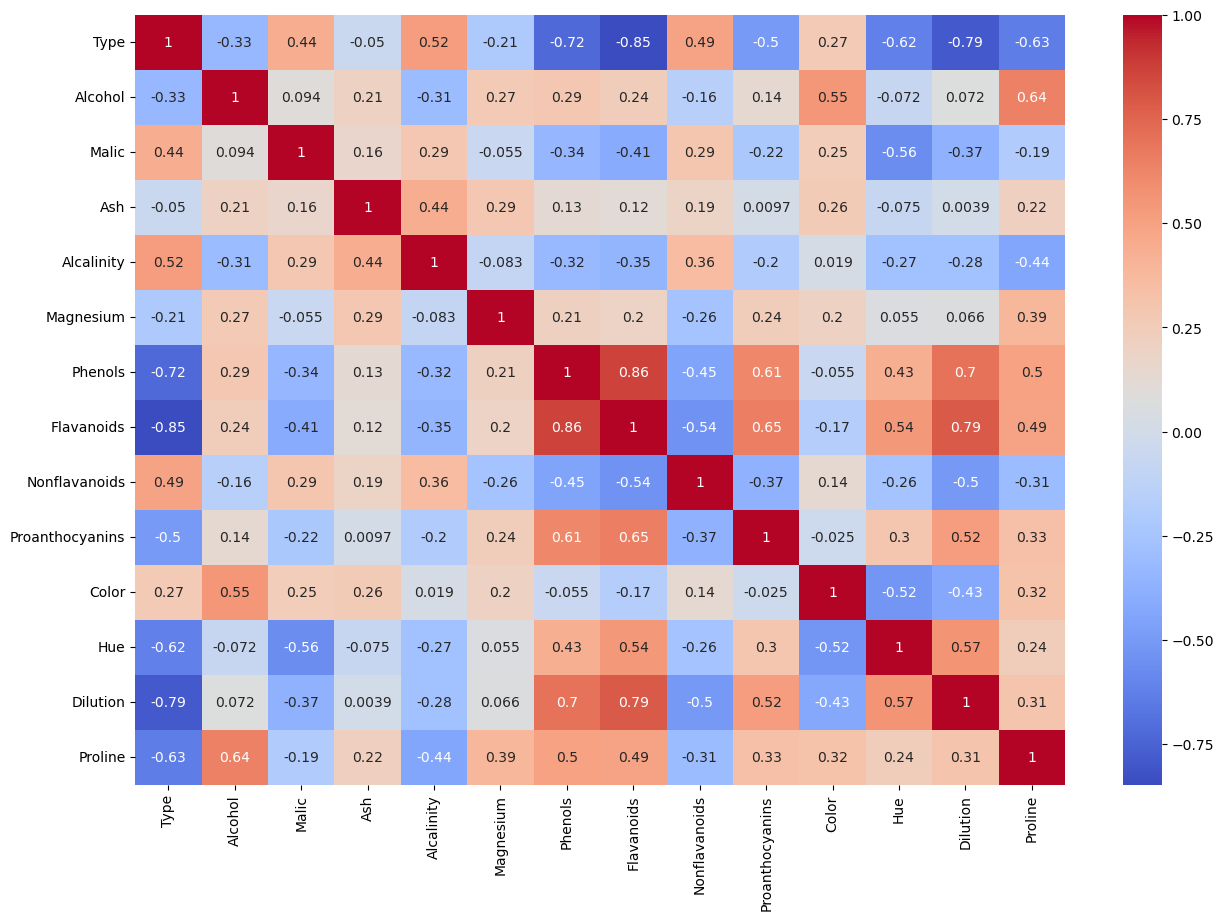

In [35]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


#### Task 2: Dimensionality Reduction with PCA
1. Standardize the features.

In [38]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


## 2. Implement PCA and determine the optimal number of principal components.

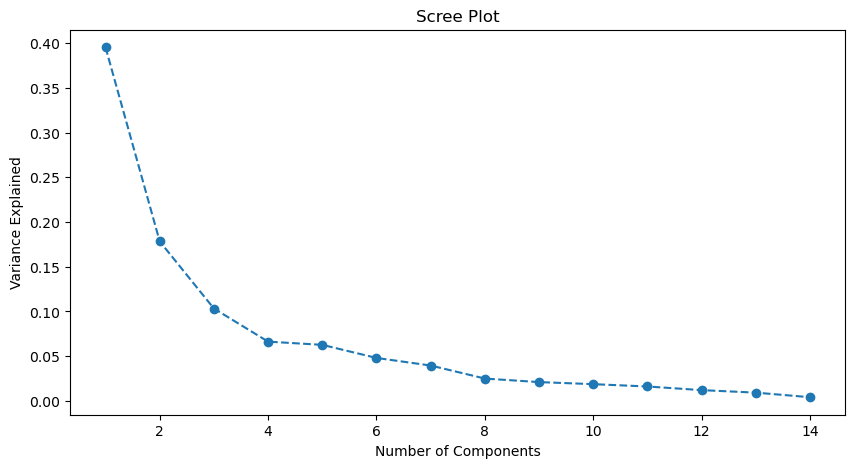

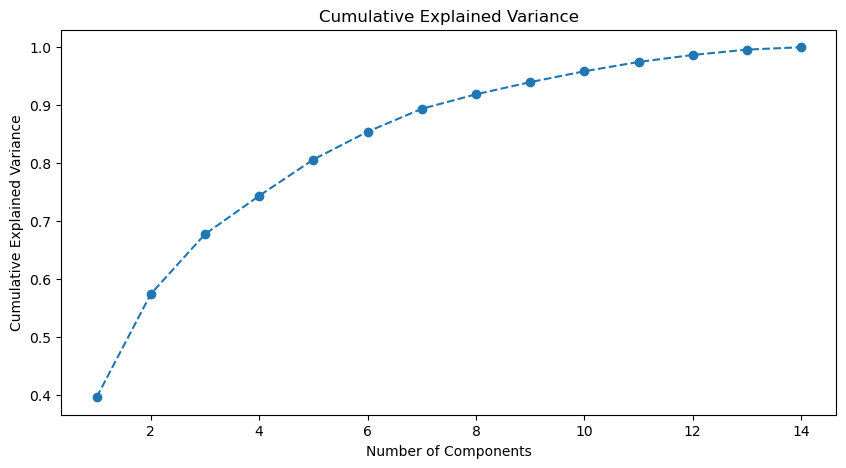

In [40]:
from sklearn.decomposition import PCA

# PCA
pca = PCA()
pca.fit(df_scaled)

# Scree plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.show()

# Cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()


### 3. Transform the original dataset into the principal components.

In [42]:
# Choosing the number of components (e.g., 95% variance)
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_scaled)


#### Task 3: Clustering with Original Data
1. Apply a clustering algorithm (e.g., K-means).

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Example with 3 clusters
clusters = kmeans.fit_predict(df_scaled)

# Add clusters to the dataframe
df['Cluster'] = clusters


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 2. Visualize the clustering results

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


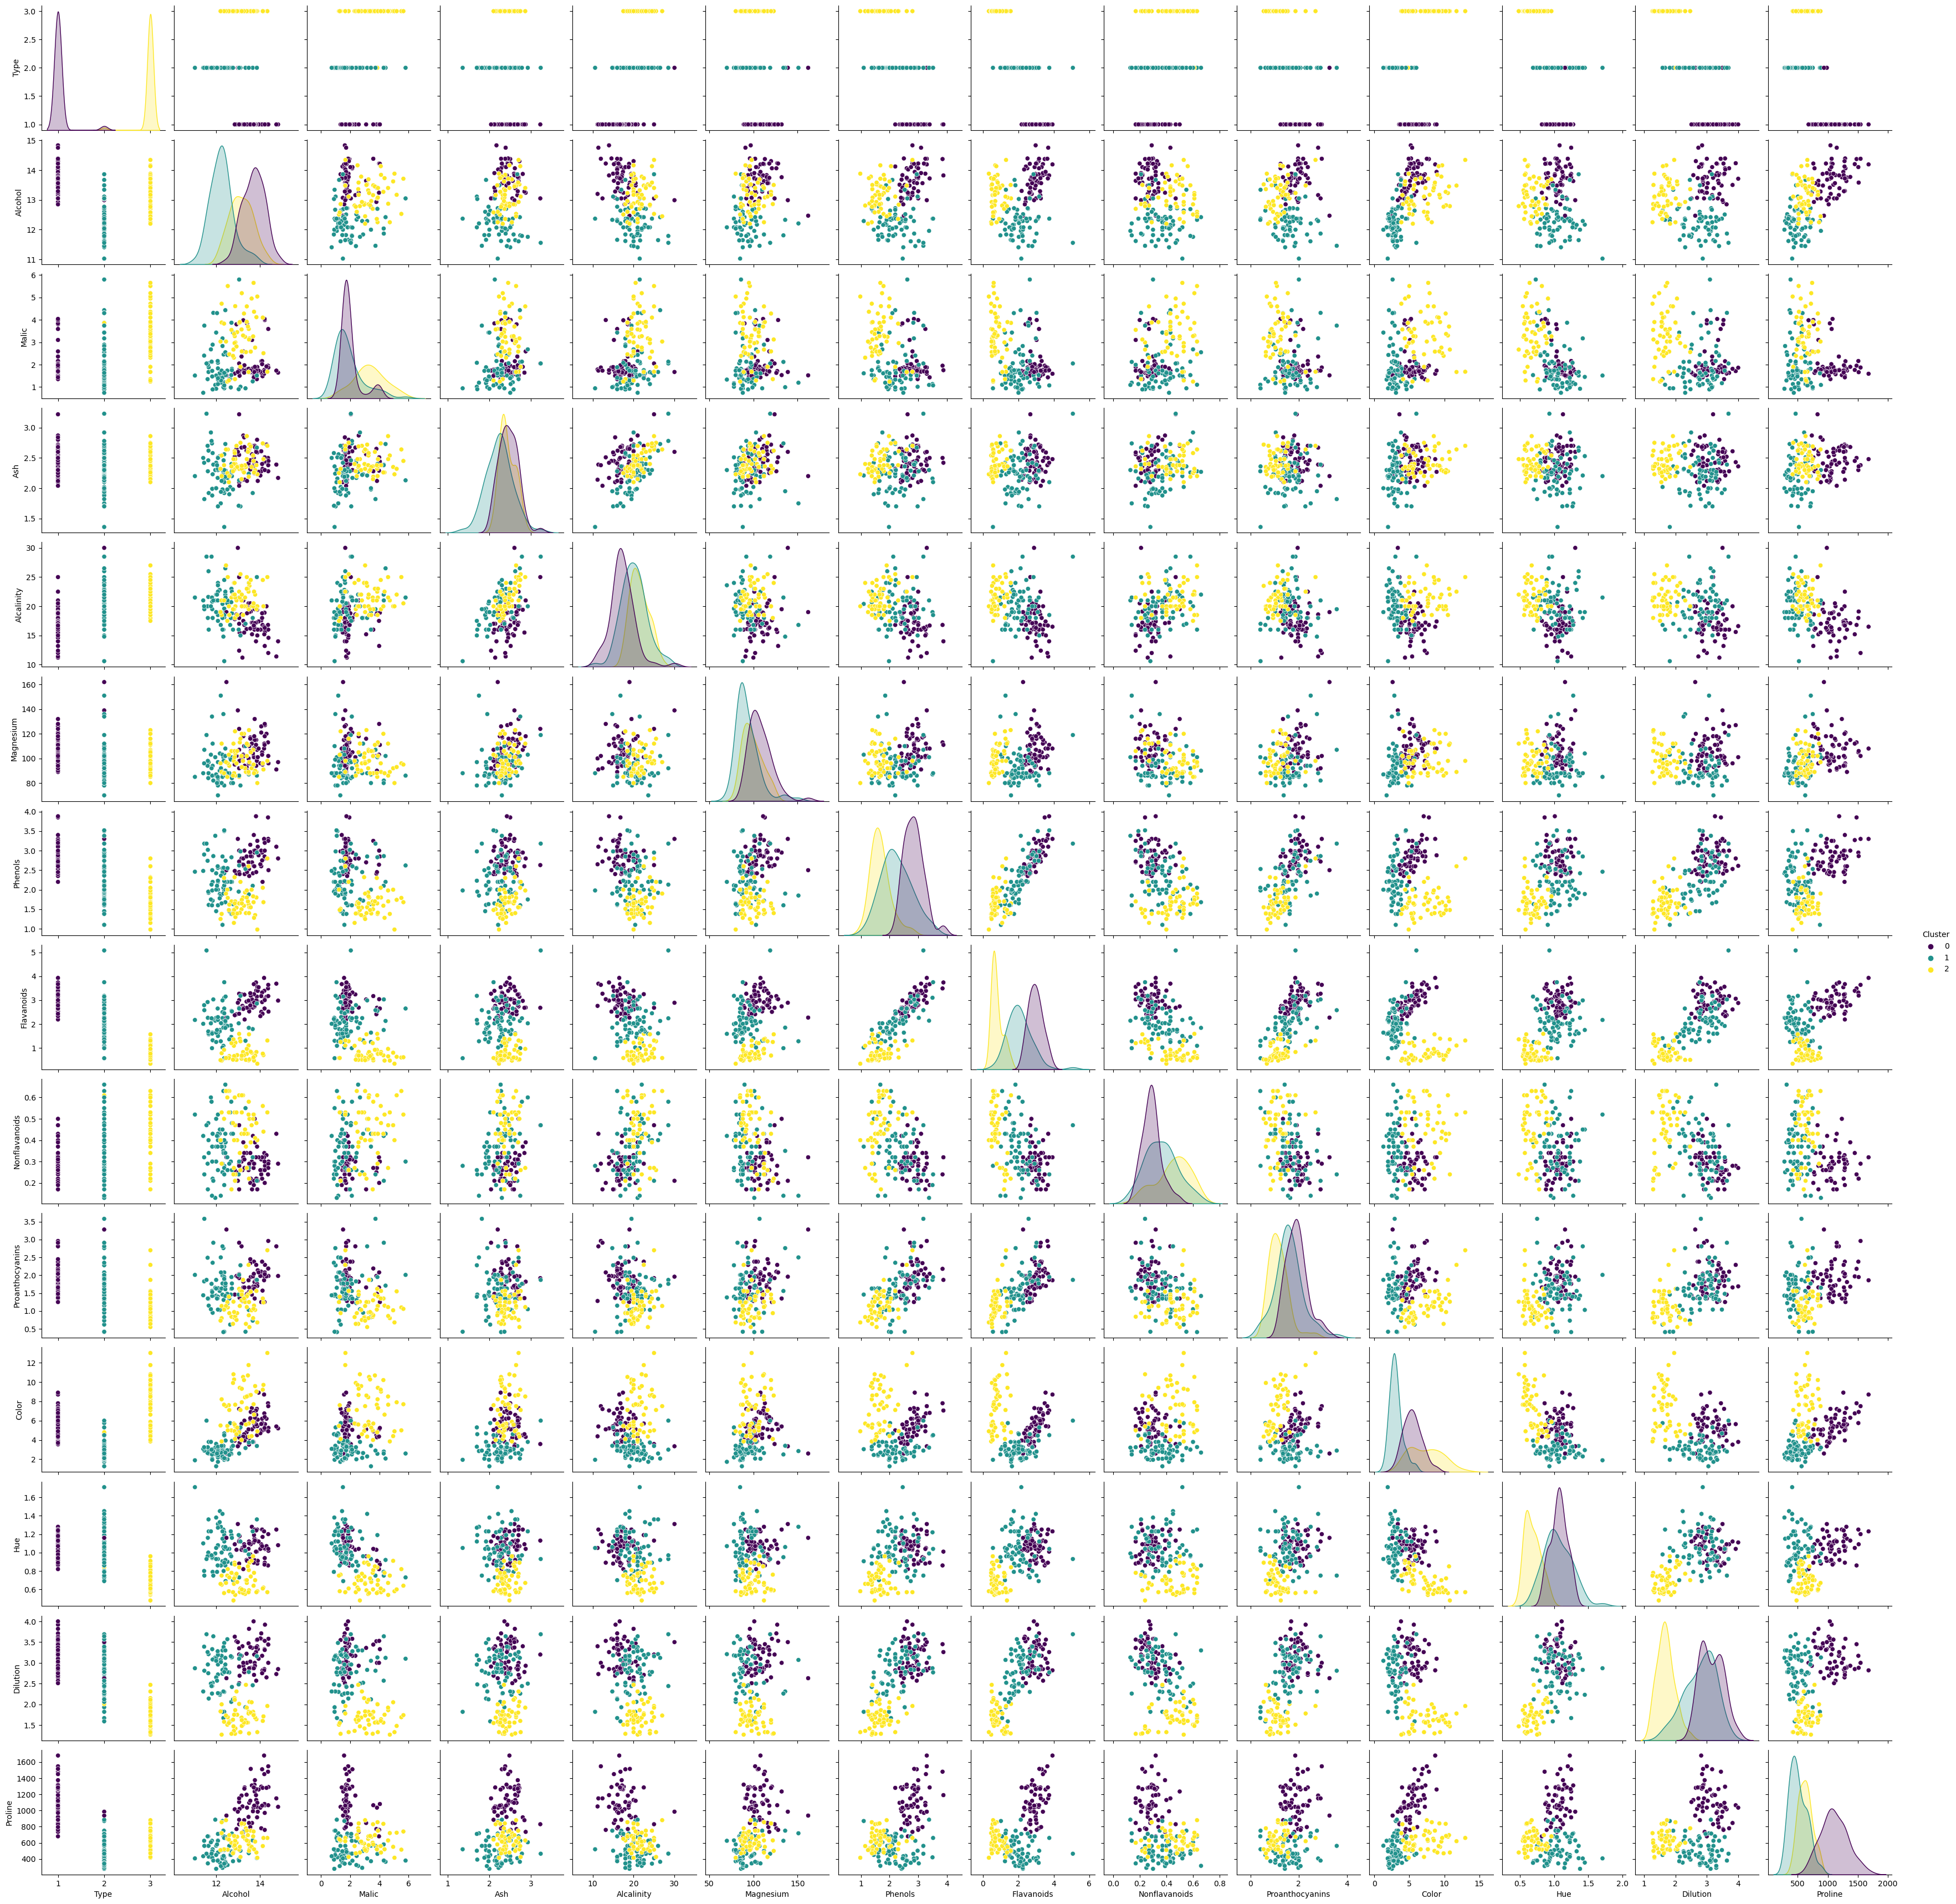

In [44]:
# Pairplot
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()


### 3. Evaluate the clustering performance.

In [45]:
silhouette_avg = silhouette_score(df_scaled, clusters)
davies_bouldin_avg = davies_bouldin_score(df_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin_avg}')


Silhouette Score: 0.30773604383565206
Davies-Bouldin Index: 1.3163957434114109


### Task 4: Clustering with PCA Data
1. Apply the same clustering algorithm to the PCA-transformed dataset.

In [46]:
# K-means clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(df_pca)

# Add clusters to the PCA-transformed data
df_pca_clustered = pd.DataFrame(df_pca)
df_pca_clustered['Cluster'] = clusters_pca


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 2. Visualize the clustering results from PCA data.

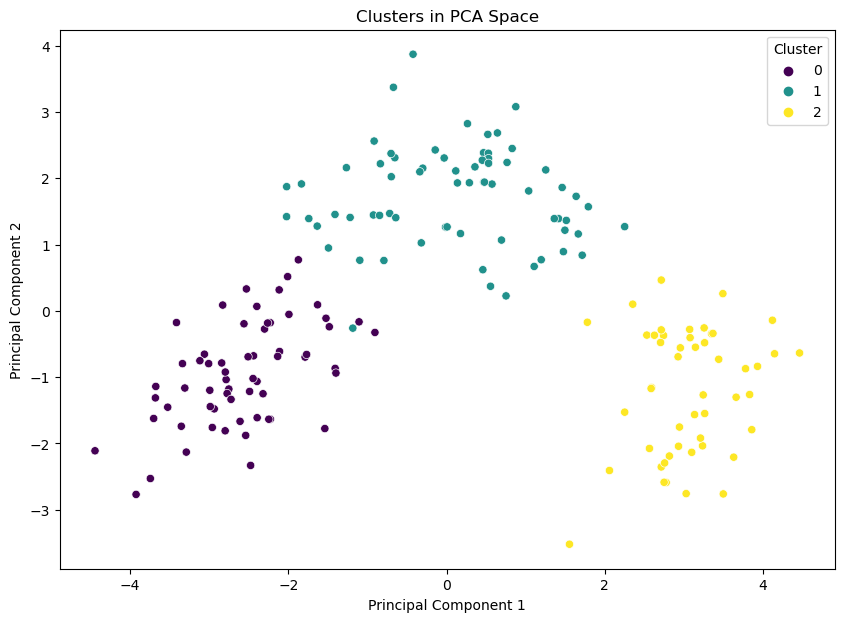

In [49]:
# Visualizing first two principal components
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca_clustered[0], y=df_pca_clustered[1], hue=df_pca_clustered['Cluster'], palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters in PCA Space')
plt.show()


### 3. Evaluate the clustering performance.

In [48]:
silhouette_avg_pca = silhouette_score(df_pca, clusters_pca)
davies_bouldin_avg_pca = davies_bouldin_score(df_pca, clusters_pca)
print(f'Silhouette Score (PCA): {silhouette_avg_pca}')
print(f'Davies-Bouldin Index (PCA): {davies_bouldin_avg_pca}')


Silhouette Score (PCA): 0.3240658205331187
Davies-Bouldin Index (PCA): 1.2584890242254974


### Task 5: Comparison and Analysis
1. Compare the clustering results.

In [50]:
# Compare silhouette scores and Davies-Bouldin indices
print(f'Original Data Silhouette Score: {silhouette_avg}, PCA Data Silhouette Score: {silhouette_avg_pca}')
print(f'Original Data Davies-Bouldin Index: {davies_bouldin_avg}, PCA Data Davies-Bouldin Index: {davies_bouldin_avg_pca}')


Original Data Silhouette Score: 0.30773604383565206, PCA Data Silhouette Score: 0.3240658205331187
Original Data Davies-Bouldin Index: 1.3163957434114109, PCA Data Davies-Bouldin Index: 1.2584890242254974


##### 2. Discuss similarities or differences observed in the clustering results.
Original data clustering may show more complex patterns due to higher dimensionality.
PCA data clustering often results in simpler, more interpretable clusters but may lose some information.
3. Reflect on the impact of dimensionality reduction on clustering performance.
PCA helps in reducing noise and computational complexity.
Dimensionality reduction can improve clustering performance if the original data has redundant or irrelevant features.
4. Analyze the trade-offs.
Using PCA can make the clustering process more efficient and sometimes more effective.
However, PCA might also discard some useful information, affecting clustering quality.
Task 6: Conclusion and Insights
1. Summarize the key findings and insights.
PCA can significantly reduce the dimensionality while retaining most of the variance.
Clustering on PCA-transformed data can be more efficient and provide clearer patterns.
The performance of clustering algorithms can be measured using metrics like silhouette score and Davies-Bouldin index.
2. Discuss the practical implications.
PCA is useful for simplifying datasets and improving the performance of clustering algorithms.
It is particularly helpful in high-dimensional datasets where computational efficiency and noise reduction are important.
3. Provide recommendations.
Use PCA when dealing with high-dimensional data to improve clustering performance and interpretability.
For datasets with a smaller number of features, clustering on the original data might suffice.
Always evaluate clustering performance using multiple metrics to ensure robustness.